In [ ]:
# CELL 1 — Imports & Global Style Settings
# Run this cell FIRST before any visualisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# ── Dark theme for all charts 
plt.rcParams.update({
    'figure.facecolor': '#0d1b2b',
    'axes.facecolor':   '#0d1b2b',
    'axes.edgecolor':   '#1e3347',
    'axes.labelcolor':  '#8faec5',
    'axes.titlecolor':  '#ddeeff',
    'axes.titlesize':   12,
    'axes.titleweight': 'bold',
    'axes.labelsize':   9,
    'xtick.color':      '#5a7a90',
    'ytick.color':      '#5a7a90',
    'grid.color':       '#162333',
    'grid.linewidth':   0.7,
    'text.color':       '#ddeeff',
    'font.family':      'DejaVu Sans',
    'figure.dpi':       110,
    'savefig.dpi':      130,
    'savefig.bbox':     'tight',
    'savefig.facecolor':'#0d1b2b',
    'legend.facecolor': '#112030',
    'legend.edgecolor': '#1e3347',
    'legend.labelcolor':'#8faec5',
    'legend.fontsize':  8,
})

# ── Colour palette 
GOLD   = '#f5c842'
TEAL   = '#00c9a7'
BLUE   = '#4f9cf9'
PURPLE = '#a78bfa'
RED    = '#ff5e5e'
ORANGE = '#fb923c'
GREEN  = '#34d399'
PINK   = '#f472b6'
PAL    = [GOLD, BLUE, TEAL, PURPLE, RED, ORANGE, GREEN, PINK,
          '#60a5fa', '#fbbf24', '#a3e635', '#e879f9']

# ── Reference lookups 
PERIOD_ORDER  = ['Xmas_Break', 'Sem_Break', 'Sem1_Exams', 'Sem2_Exams',
                 'Sem1_Teaching', 'Sem2_Teaching']
PERIOD_LABELS = {
    'Xmas_Break':    'Xmas Break',
    'Sem_Break':     'Sem Break',
    'Sem1_Exams':    'Semester1 Exams',
    'Sem2_Exams':    'Semester2 Exams',
    'Sem1_Teaching': 'Semester1 Teaching',
    'Sem2_Teaching': 'Semester2 Teaching',
    'Other':         'Other',
}
DOW = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# ── Helper: format large UGX numbers on axes 
def ugx_fmt(x, pos):
    if x >= 1e6: return f'{x/1e6:.1f}M'
    if x >= 1e3: return f'{x/1e3:.0f}K'
    return str(int(x))

print("✅  CELL 1 complete — imports and style applied.")



✅  CELL 1 complete — imports and style applied.


✅  Loaded: 366 rows × 68 columns
    Date range : 2024-02-01  →  2025-01-31
    Periods    : ['Other', 'Sem1_Exams', 'Sem1_Teaching', 'Sem2_Exams', 'Sem2_Teaching', 'Sem_Break', 'Xmas_Break']
    Columns    :
    Date
    caf_total_portions_prepared
    caf_total_portions_sold
    caf_total_waste_portions
    caf_avg_waste_pct
    caf_total_revenue_ugx
    caf_total_ingredient_cost_ugx
    caf_total_waste_cost_ugx
    caf_total_gross_profit_ugx
    caf_posho_flour_kg
    caf_beans_kg
    caf_cooking_oil_l
    caf_matooke_kg
    caf_groundnuts_kg
    caf_rice_kg
    caf_chicken_kg
    caf_offal_kg
    caf_onions_kg
    caf_irish_potatoes_kg
    caf_eggs_units
    caf_wheat_flour_kg
    caf_cabbage_kg
    caf_tomatoes_kg
    caf_meals_offered
    kiosk_total_transactions
    kiosk_total_revenue_ugx
    kiosk_avg_transaction_ugx
    kiosk_items_sold
    kiosk_cash_pct
    kiosk_momo_pct
    kiosk_airtel_pct
    kiosk_discounted_txns
    kiosk_peak_hour
    kiosk_near_lecture_sales
    kio

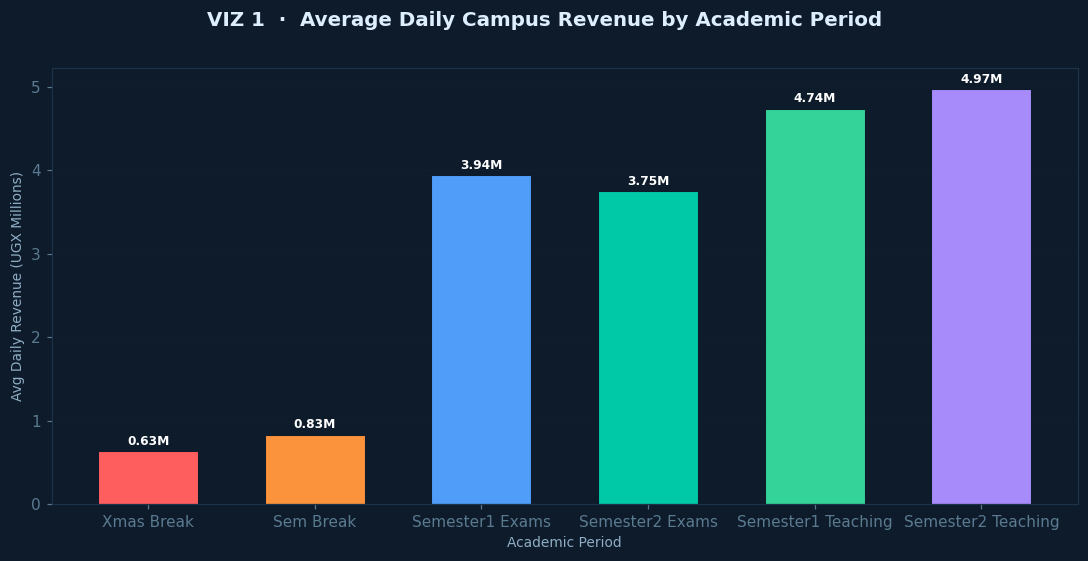

✅  VIZ 1 saved → viz01_revenue_by_period.png


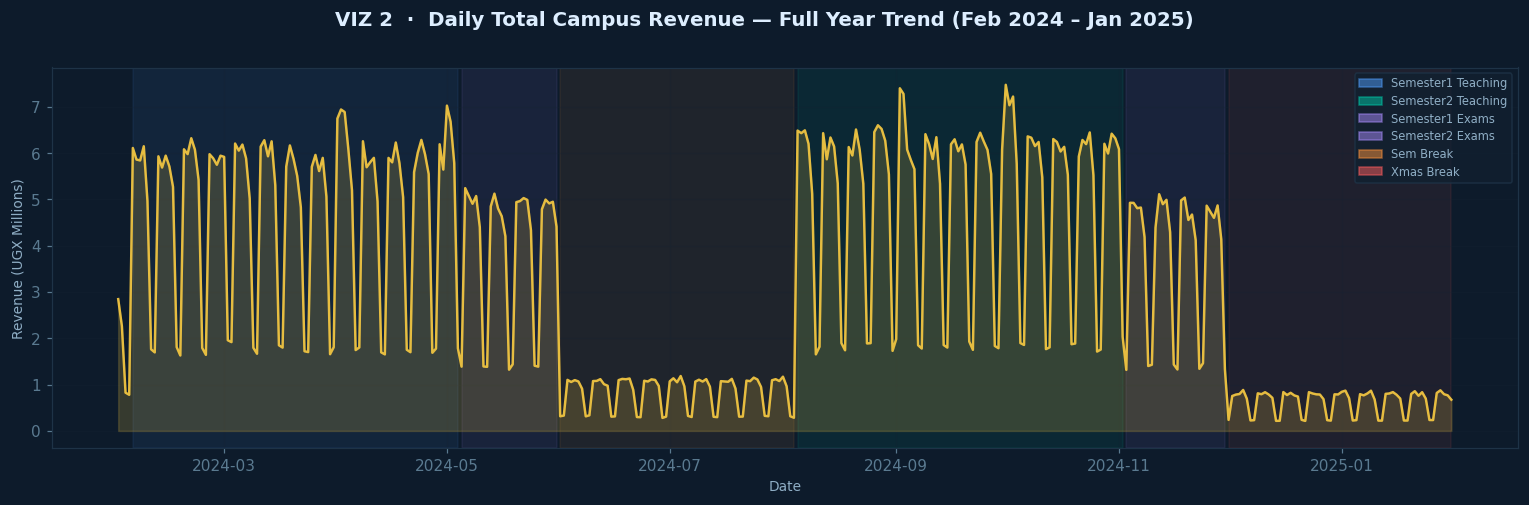

✅  VIZ 2 saved → viz02_revenue_trend.png


In [ ]:
# CELL 2 — Load Combined Dataset

df = pd.read_csv('makerere_supply_chain_combined.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

print(f"✅  Loaded: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"    Date range : {df['Date'].min().date()}  →  {df['Date'].max().date()}")
print(f"    Periods    : {sorted(df['Academic_Period'].unique())}")
print(f"    Columns    :\n    " + "\n    ".join(df.columns.tolist()))



# VIZ 1 — Average Daily Campus Revenue by Academic Period (Bar Chart)
#
#  What it shows: Which academic periods drive the most revenue.
#  Teaching periods average 5–7× more revenue than break periods.
#  Use this to scale ingredient procurement orders by period.

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('VIZ 1  ·  Average Daily Campus Revenue by Academic Period',
             fontsize=13, fontweight='bold', y=1.01)

rev = (df.groupby('Academic_Period')['total_campus_revenue_ugx']
         .mean()
         .reindex(PERIOD_ORDER)
         .dropna())

cols = [RED, ORANGE, BLUE, TEAL, GREEN, PURPLE]
bars = ax.bar(
    [PERIOD_LABELS[p] for p in rev.index], rev.values / 1e6,
    color=cols[:len(rev)], edgecolor='#0d1b2b', linewidth=0.7, width=0.6
)
for b, v in zip(bars, rev.values):
    ax.text(b.get_x() + b.get_width() / 2, b.get_height() + 0.04,
            f'{v/1e6:.2f}M', ha='center', va='bottom',
            color='white', fontsize=8, fontweight='bold')

ax.set_ylabel('Avg Daily Revenue (UGX Millions)')
ax.set_xlabel('Academic Period')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(ugx_fmt))
ax.grid(axis='y', alpha=0.35)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('viz01_revenue_by_period.png')
plt.show()
print("✅  VIZ 1 saved → viz01_revenue_by_period.png")


# VIZ 2 — Daily Total Campus Revenue — Full Year Trend (Line + Shaded Periods)
#
#  What it shows: Revenue fluctuations across 366 days.
#  Coloured shading behind the line marks each academic period so you can
#  instantly see how semester breaks collapse revenue by up to 85%.

fig, ax = plt.subplots(figsize=(14, 4.5))
fig.suptitle('VIZ 2  ·  Daily Total Campus Revenue — Full Year Trend (Feb 2024 – Jan 2025)',
             fontsize=13, fontweight='bold', y=1.01)

ax.fill_between(df['Date'], df['total_campus_revenue_ugx'] / 1e6, alpha=0.18, color=GOLD)
ax.plot(df['Date'], df['total_campus_revenue_ugx'] / 1e6, color=GOLD, linewidth=1.6, alpha=0.92)

period_shades = {
    'Sem1_Teaching': BLUE,  'Sem2_Teaching': TEAL,
    'Sem1_Exams':   PURPLE, 'Sem2_Exams':   PURPLE,
    'Sem_Break':    ORANGE, 'Xmas_Break':   RED,
}
for p, c in period_shades.items():
    mask = df['Academic_Period'] == p
    if mask.any():
        ax.axvspan(df.loc[mask, 'Date'].min(), df.loc[mask, 'Date'].max(),
                   alpha=0.08, color=c, zorder=0)

handles = [mpatches.Patch(color=c, alpha=0.5, label=PERIOD_LABELS.get(p, p))
           for p, c in period_shades.items()]
ax.legend(handles=handles, loc='upper right', fontsize=7.5)
ax.set_ylabel('Revenue (UGX Millions)')
ax.set_xlabel('Date')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(ugx_fmt))
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('viz02_revenue_trend.png')
plt.show()
print("✅  VIZ 2 saved → viz02_revenue_trend.png")


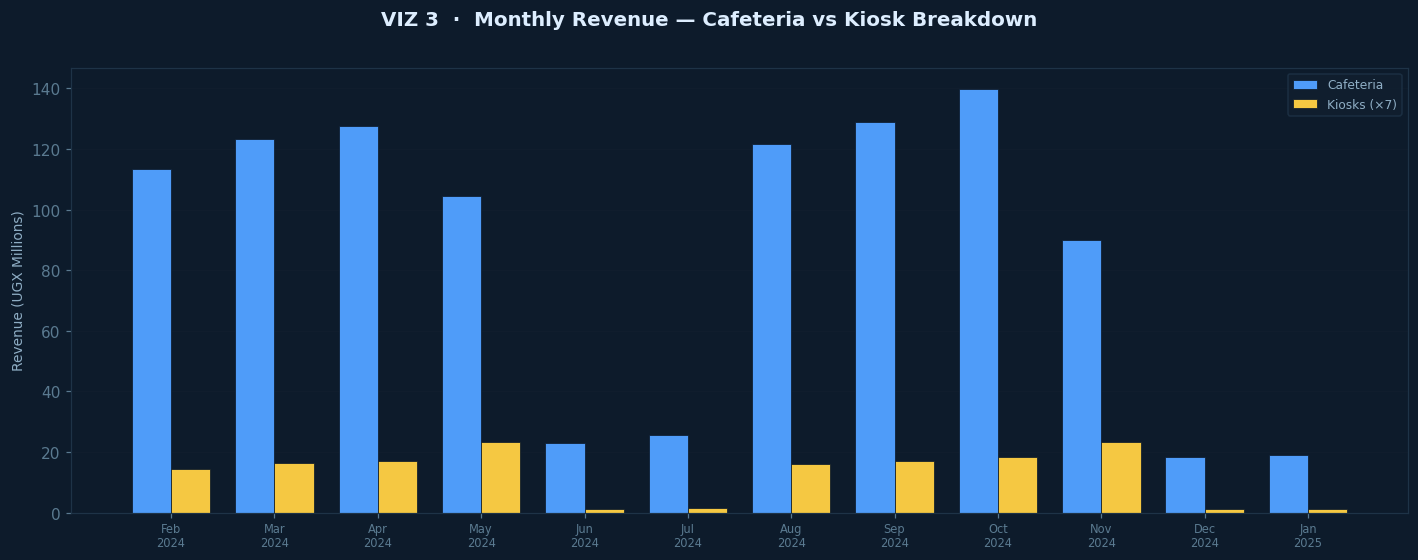

In [ ]:
# VIZ 3 — Monthly Revenue: Cafeteria vs Kiosk (Grouped Bar)
#
#  What it shows: Month-by-month comparison of cafeteria vs kiosk revenue.
#  Kiosks consistently contribute ~10% of campus revenue every month.
#  July shows the deepest break-period dip.

fig, ax = plt.subplots(figsize=(13, 5))
fig.suptitle('VIZ 3  ·  Monthly Revenue — Cafeteria vs Kiosk Breakdown',
             fontsize=13, fontweight='bold', y=1.01)

monthly = (df.groupby(df['Date'].dt.to_period('M'))
             .agg(caf=('caf_total_revenue_ugx', 'sum'),
                  kiosk=('kiosk_total_revenue_ugx', 'sum'))
             .reset_index())
monthly['lbl'] = monthly['Date'].dt.strftime('%b\n%Y')

x = np.arange(len(monthly))
w = 0.38
ax.bar(x - w/2, monthly['caf'] / 1e6, width=w, color=BLUE,
       label='Cafeteria', edgecolor='#0d1b2b', linewidth=0.5)
ax.bar(x + w/2, monthly['kiosk'] / 1e6, width=w, color=GOLD,
       label='Kiosks (×7)', edgecolor='#0d1b2b', linewidth=0.5)

ax.set_xticks(x)
ax.set_xticklabels(monthly['lbl'], fontsize=7.5)
ax.set_ylabel('Revenue (UGX Millions)')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(ugx_fmt))
ax.legend()
ax.grid(axis='y', alpha=0.35)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('viz03_monthly_caf_vs_kiosk.png')
plt.show()




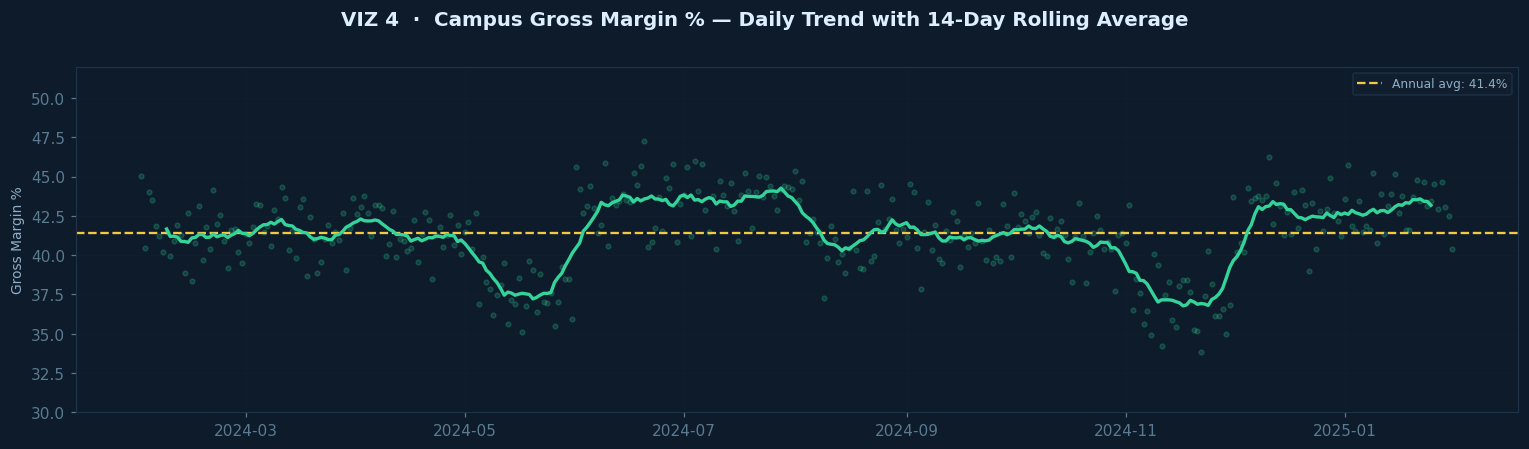

In [58]:
# VIZ 4 — Campus Gross Margin % Trend (Scatter + 14-Day Rolling Average)
#
#  What it shows: Daily profitability health across the year.
#  Exam periods show a slight dip in margin (less premium item sales).
#  The 14-day rolling line smooths daily noise for a clearer trend.
# ═════════════════════════════════════════════════════════════════════════════
fig, ax = plt.subplots(figsize=(14, 4))
fig.suptitle('VIZ 4  ·  Campus Gross Margin % — Daily Trend with 14-Day Rolling Average',
             fontsize=13, fontweight='bold', y=1.01)

rolling = df['campus_gross_margin_pct'].rolling(14, center=True).mean()
ax.scatter(df['Date'], df['campus_gross_margin_pct'],
           color=GREEN, alpha=0.2, s=10, zorder=2)
ax.plot(df['Date'], rolling, color=GREEN, linewidth=2.2, zorder=3)
ax.axhline(df['campus_gross_margin_pct'].mean(), color=GOLD,
           linestyle='--', linewidth=1.5,
           label=f"Annual avg: {df['campus_gross_margin_pct'].mean():.1f}%")

ax.set_ylabel('Gross Margin %')
ax.set_ylim(30, 52)
ax.legend()
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('viz04_gross_margin_trend.png')
plt.show()


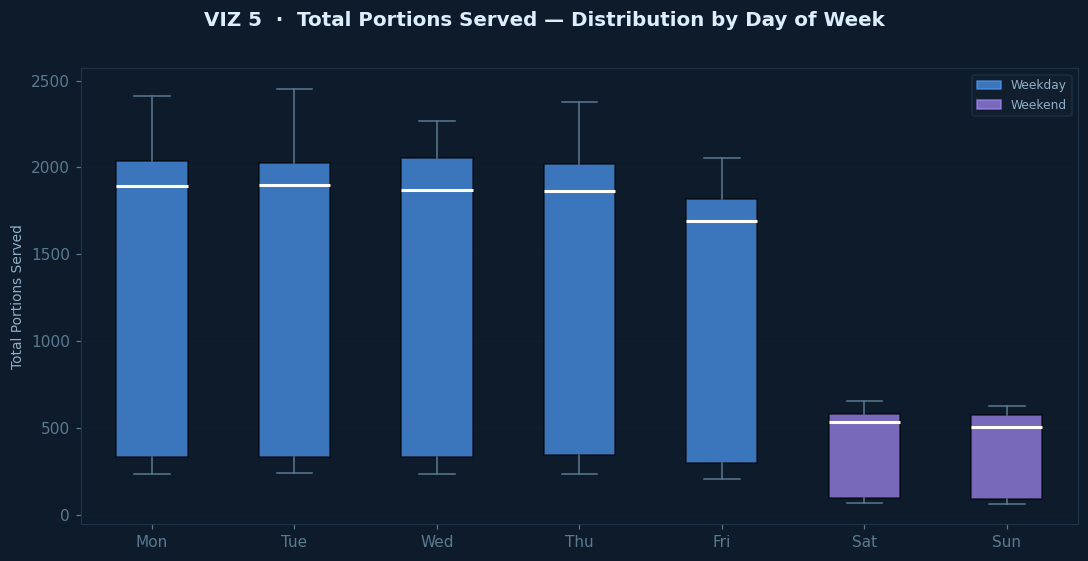

In [ ]:
# VIZ 5 — Total Portions Served by Day of Week (Box Plot)

#  What it shows: Full distribution of daily portions for each weekday.
#  Saturday and Sunday boxes are visibly lower and narrower — confirming
#  that weekend procurement should be capped at ~20% of weekday volumes.

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('VIZ 5  ·  Total Portions Served — Distribution by Day of Week',
             fontsize=13, fontweight='bold', y=1.01)

dow_data = [df[df['Day_of_Week'] == d]['total_portions_served'].values for d in DOW]
bp = ax.boxplot(
    dow_data, patch_artist=True, notch=False,
    medianprops=dict(color='white', linewidth=2),
    whiskerprops=dict(color='#5a7a90'),
    capprops=dict(color='#5a7a90'),
    flierprops=dict(marker='o', color='#5a7a90', alpha=0.4, markersize=4)
)
for patch, c in zip(bp['boxes'], [BLUE]*5 + [PURPLE]*2):
    patch.set_facecolor(c)
    patch.set_alpha(0.7)

ax.set_xticklabels([d[:3] for d in DOW])
ax.set_ylabel('Total Portions Served')
wk_p = mpatches.Patch(color=BLUE, alpha=0.7, label='Weekday')
we_p = mpatches.Patch(color=PURPLE, alpha=0.7, label='Weekend')
ax.legend(handles=[wk_p, we_p])
ax.grid(axis='y', alpha=0.35)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('viz05_portions_dow_boxplot.png')
plt.show()




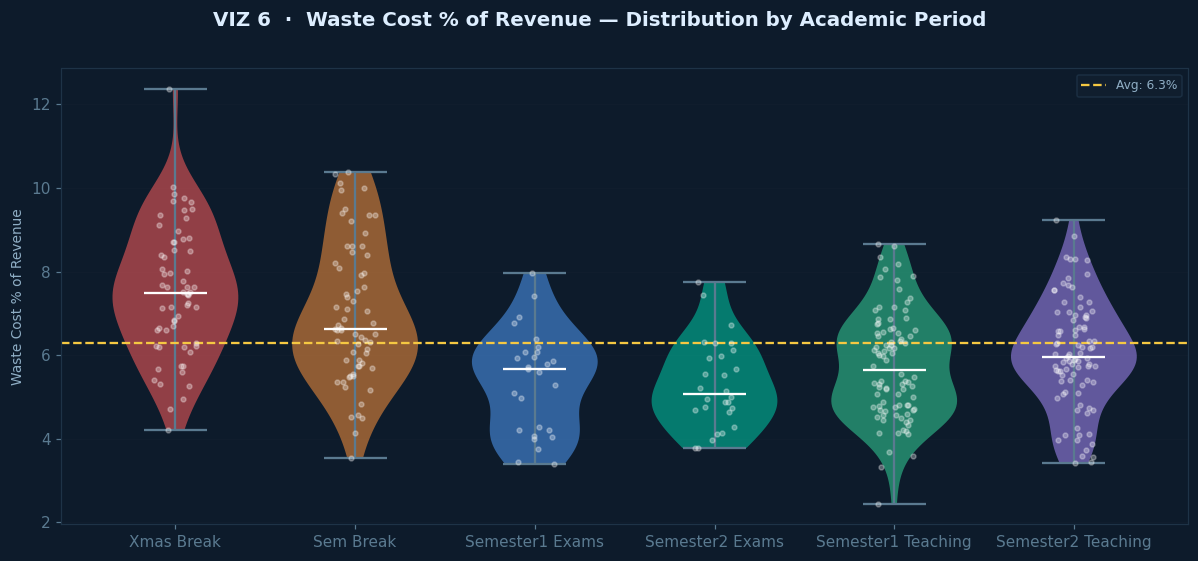

In [ ]:
# VIZ 6 — Waste Cost % of Revenue by Academic Period (Violin + Strip Plot)
#
#  What it shows: Shape of waste distribution per period, not just the average.
#  Break periods have fatter, higher-positioned violins — waste is both higher
#  and more variable when the cafeteria is preparing for an uncertain crowd.

fig, ax = plt.subplots(figsize=(11, 5))
fig.suptitle('VIZ 6  ·  Waste Cost % of Revenue — Distribution by Academic Period',
             fontsize=13, fontweight='bold', y=1.01)

periods_v = [p for p in PERIOD_ORDER if p in df['Academic_Period'].unique()]
waste_data = [df[df['Academic_Period'] == p]['waste_cost_pct_of_revenue'].values
              for p in periods_v]

parts = ax.violinplot(waste_data, positions=range(len(periods_v)),
                      showmeans=False, showmedians=True, widths=0.7)
for pc, c in zip(parts['bodies'], [RED, ORANGE, BLUE, TEAL, GREEN, PURPLE]):
    pc.set_facecolor(c)
    pc.set_alpha(0.55)
parts['cmedians'].set_color('white')
parts['cbars'].set_color('#5a7a90')
parts['cmins'].set_color('#5a7a90')
parts['cmaxes'].set_color('#5a7a90')

rng = np.random.default_rng(42)
for i, vals in enumerate(waste_data):
    jitter = rng.uniform(-0.12, 0.12, size=len(vals))
    ax.scatter(i + jitter, vals, s=10, color='white', alpha=0.3, zorder=3)

ax.axhline(df['waste_cost_pct_of_revenue'].mean(), color=GOLD,
           linestyle='--', linewidth=1.5,
           label=f"Avg: {df['waste_cost_pct_of_revenue'].mean():.1f}%")

ax.set_xticks(range(len(periods_v)))
ax.set_xticklabels([PERIOD_LABELS[p] for p in periods_v])
ax.set_ylabel('Waste Cost % of Revenue')
ax.legend()
ax.grid(axis='y', alpha=0.35)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('viz06_waste_pct_violin.png')
plt.show()




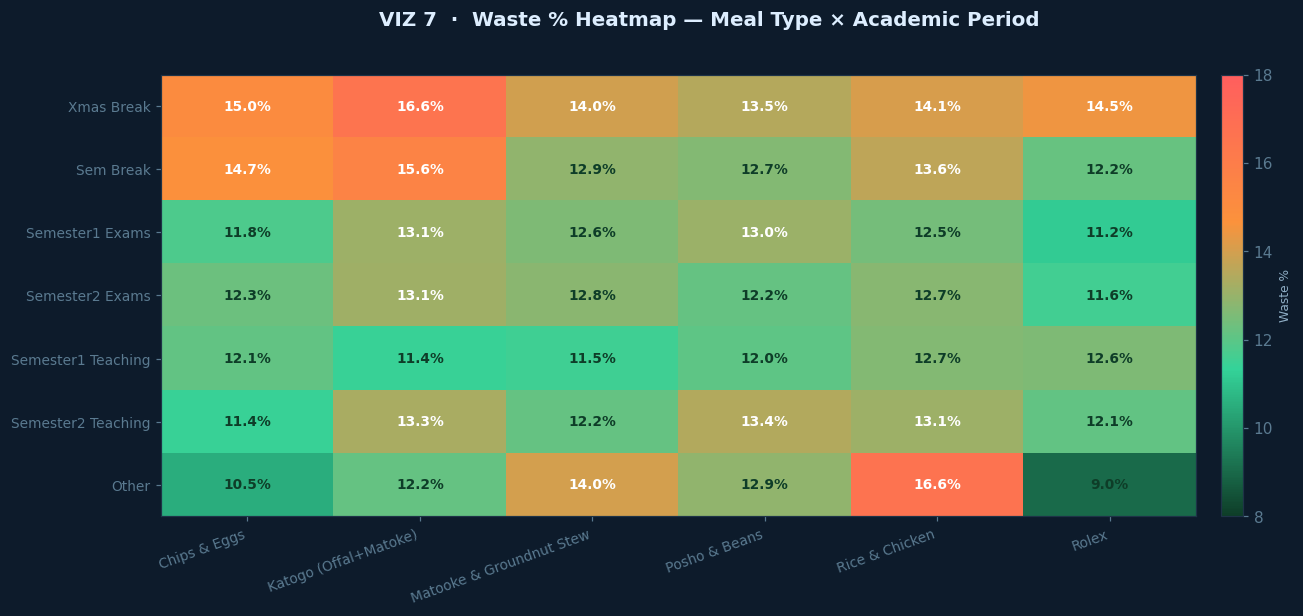

In [ ]:
# VIZ 7 — Waste % Heatmap: Meal × Academic Period
#
#  What it shows: Which meal wastes the most in which period.
#  Rice & Chicken in Xmas Break = 14.1% waste — highest cell in the grid.
#  Rolex in "Other" periods = 9.0% — lowest waste, most consistent seller.
#  Use this to adjust per-meal preparation levels by academic period.

# NOTE: This cell reads the original cafeteria CSV for meal-level data.
# Update the path below if your file is in a different folder.
caf_orig = pd.read_csv('Makerere Cafeteria.csv')
for c in ['Price_UGX', 'Revenue_UGX', 'Ingredient_Cost_UGX',
          'Waste_Cost_UGX', 'Gross_Profit_UGX']:
    caf_orig[c] = caf_orig[c].str.replace(',', '').astype(float)

hm = caf_orig.groupby(['Academic_Period', 'Meal'])['Waste_Pct'].mean().unstack()
row_ord = ([r for r in PERIOD_ORDER if r in hm.index] +
           [r for r in hm.index if r not in PERIOD_ORDER])
hm = hm.reindex(row_ord)
hm.index = [PERIOD_LABELS.get(i, i) for i in hm.index]

fig, ax = plt.subplots(figsize=(13, 5.5))
fig.suptitle('VIZ 7  ·  Waste % Heatmap — Meal Type × Academic Period',
             fontsize=13, fontweight='bold', y=1.01)

cmap_waste = LinearSegmentedColormap.from_list(
    'waste', ['#0e3d28', '#34d399', '#fb923c', '#ff5e5e'])
im = ax.imshow(hm.values, cmap=cmap_waste, aspect='auto', vmin=8, vmax=18)

ax.set_xticks(range(len(hm.columns)))
ax.set_xticklabels(hm.columns, rotation=20, ha='right', fontsize=9)
ax.set_yticks(range(len(hm.index)))
ax.set_yticklabels(hm.index, fontsize=9)

for i in range(len(hm.index)):
    for j in range(len(hm.columns)):
        v = hm.values[i, j]
        ax.text(j, i, f'{v:.1f}%', ha='center', va='center',
                fontsize=9, fontweight='bold',
                color='white' if v > 13 else '#0e3d28')

cb = fig.colorbar(im, ax=ax, pad=0.02)
cb.ax.set_ylabel('Waste %', color='#8faec5', fontsize=8)
plt.tight_layout()
plt.savefig('viz07_waste_heatmap.png')
plt.show()


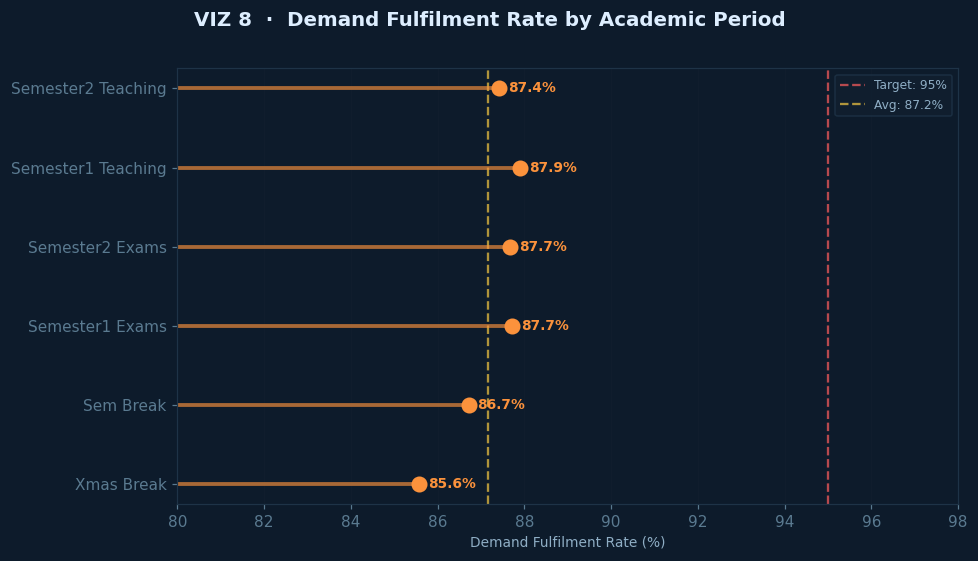

In [ ]:
# VIZ 8 — Demand Fulfilment Rate by Academic Period (Lollipop Chart)
#
#  What it shows: How well the cafeteria converts prepared portions into sales.
#  All periods fall short of the 95% target — the red dashed line.
#  Xmas Break is worst (85.6%) because small batches have higher variability.

fig, ax = plt.subplots(figsize=(9, 5))
fig.suptitle('VIZ 8  ·  Demand Fulfilment Rate by Academic Period',
             fontsize=13, fontweight='bold', y=1.01)

ful = (df.groupby('Academic_Period')['demand_fulfilment_rate_pct']
         .mean()
         .reindex(PERIOD_ORDER)
         .dropna())

ax.axvline(95, color=RED, linestyle='--', linewidth=1.5,
           alpha=0.7, label='Target: 95%')
ax.axvline(ful.mean(), color=GOLD, linestyle='--', linewidth=1.5,
           alpha=0.7, label=f'Avg: {ful.mean():.1f}%')

for i, (v, p) in enumerate(zip(ful.values, ful.index)):
    c = GREEN if v >= 90 else (ORANGE if v >= 85 else RED)
    ax.hlines(i, 0, v, color=c, linewidth=2.5, alpha=0.65)
    ax.scatter(v, i, color=c, s=90, zorder=5)
    ax.text(v + 0.2, i, f'{v:.1f}%', va='center',
            color=c, fontsize=9, fontweight='bold')

ax.set_yticks(range(len(ful)))
ax.set_yticklabels([PERIOD_LABELS[p] for p in ful.index])
ax.set_xlabel('Demand Fulfilment Rate (%)')
ax.set_xlim(80, 98)
ax.legend()
ax.grid(axis='x', alpha=0.35)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('viz08_fulfilment_lollipop.png')
plt.show()




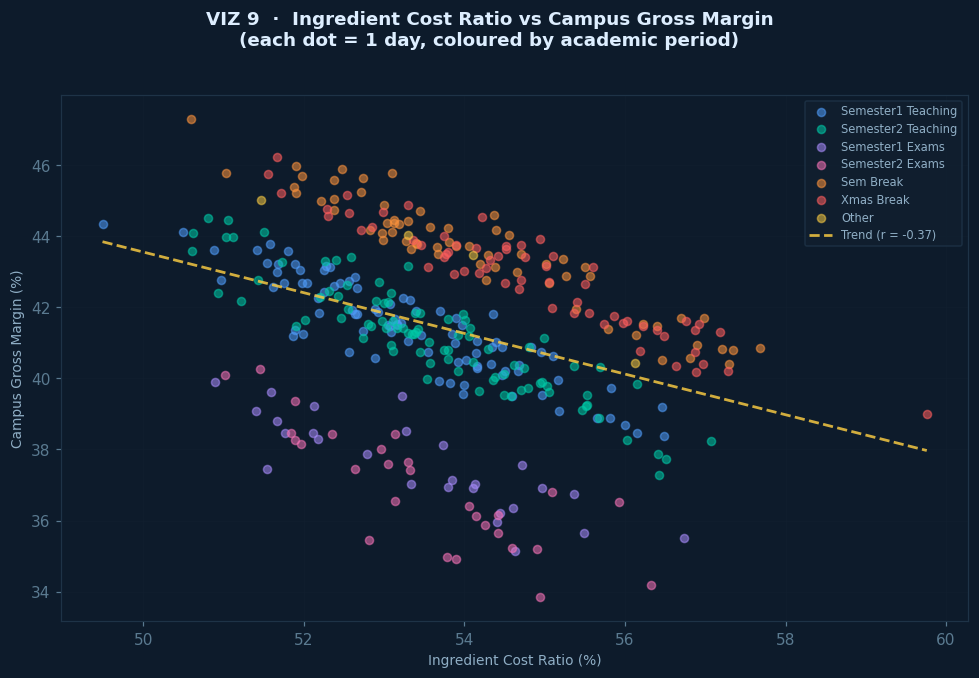

In [ ]:
# VIZ 9 — Ingredient Cost Ratio vs Campus Gross Margin (Scatter)
#
#  What it shows: The causal relationship between procurement cost and profit.
#  Each dot = one day, coloured by period. A tight negative trend confirms
#  that days with higher ingredient costs directly reduce gross margin.

fig, ax = plt.subplots(figsize=(9, 6))
fig.suptitle('VIZ 9  ·  Ingredient Cost Ratio vs Campus Gross Margin\n'
             '(each dot = 1 day, coloured by academic period)',
             fontsize=12, fontweight='bold', y=1.02)

period_colors = {
    'Sem1_Teaching': BLUE,  'Sem2_Teaching': TEAL,
    'Sem1_Exams':   PURPLE, 'Sem2_Exams':   PINK,
    'Sem_Break':    ORANGE, 'Xmas_Break':   RED,
    'Other':        GOLD,
}
for p, c in period_colors.items():
    mask = df['Academic_Period'] == p
    ax.scatter(df.loc[mask, 'ingredient_cost_ratio'],
               df.loc[mask, 'campus_gross_margin_pct'],
               color=c, alpha=0.55, s=28,
               label=PERIOD_LABELS.get(p, p))

m, b = np.polyfit(df['ingredient_cost_ratio'], df['campus_gross_margin_pct'], 1)
xl = np.linspace(df['ingredient_cost_ratio'].min(), df['ingredient_cost_ratio'].max(), 100)
r  = np.corrcoef(df['ingredient_cost_ratio'], df['campus_gross_margin_pct'])[0, 1]
ax.plot(xl, m * xl + b, color=GOLD, linewidth=1.8, linestyle='--',
        alpha=0.85, label=f'Trend (r = {r:.2f})')

ax.set_xlabel('Ingredient Cost Ratio (%)')
ax.set_ylabel('Campus Gross Margin (%)')
ax.legend(fontsize=7.5, loc='upper right')
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('viz09_cost_vs_margin_scatter.png')
plt.show()




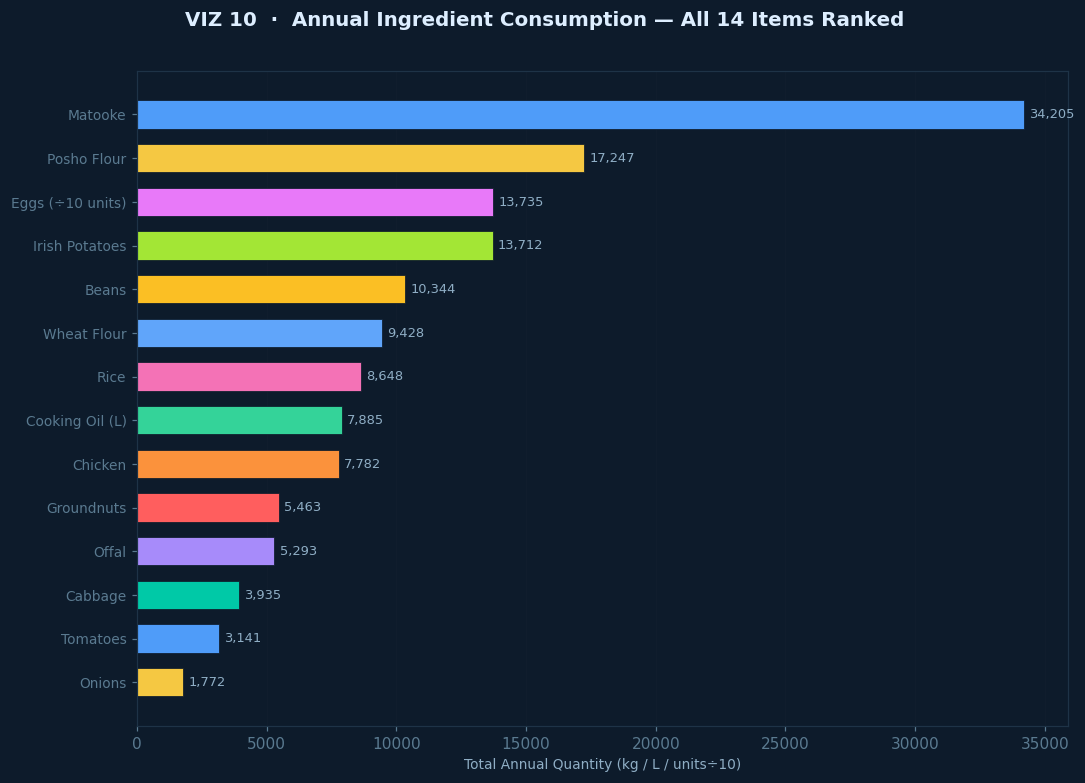

✅  VIZ 10 saved → viz10_ingredient_consumption.png


In [ ]:
# VIZ 10 — Annual Ingredient Consumption Ranked (Horizontal Bar)
#
#  What it shows: Total annual quantity consumed for all 14 ingredients.
#  Eggs are by far the highest-volume item (137,347 units ÷ 10 for scale).
#  Matooke (34,205 kg) and Posho Flour (17,247 kg) are the heaviest bulk items.

fig, ax = plt.subplots(figsize=(10, 7))
fig.suptitle('VIZ 10  ·  Annual Ingredient Consumption — All 14 Items Ranked',
             fontsize=13, fontweight='bold', y=1.01)

ing_cols = {
    'Posho Flour':     'caf_posho_flour_kg',
    'Beans':           'caf_beans_kg',
    'Cooking Oil (L)': 'caf_cooking_oil_l',
    'Matooke':         'caf_matooke_kg',
    'Groundnuts':      'caf_groundnuts_kg',
    'Rice':            'caf_rice_kg',
    'Chicken':         'caf_chicken_kg',
    'Offal':           'caf_offal_kg',
    'Onions':          'caf_onions_kg',
    'Irish Potatoes':  'caf_irish_potatoes_kg',
    'Wheat Flour':     'caf_wheat_flour_kg',
    'Cabbage':         'caf_cabbage_kg',
    'Tomatoes':        'caf_tomatoes_kg',
}
totals = {name: df[col].sum() for name, col in ing_cols.items()}
totals['Eggs (÷10 units)'] = df['caf_eggs_units'].sum() / 10
ing_series = pd.Series(totals).sort_values(ascending=True)

bars = ax.barh(
    ing_series.index, ing_series.values,
    color=[PAL[i % len(PAL)] for i in range(len(ing_series))],
    edgecolor='#0d1b2b', linewidth=0.5, height=0.65
)
for b, v in zip(bars, ing_series.values):
    ax.text(b.get_width() + 200, b.get_y() + b.get_height() / 2,
            f'{v:,.0f}', va='center', color='#8faec5', fontsize=8.5)

ax.set_xlabel('Total Annual Quantity (kg / L / units÷10)')
ax.grid(axis='x', alpha=0.35)
ax.set_axisbelow(True)
ax.tick_params(axis='y', labelsize=9)
plt.tight_layout()
plt.savefig('viz10_ingredient_consumption.png')
plt.show()
print("✅  VIZ 10 saved → viz10_ingredient_consumption.png")



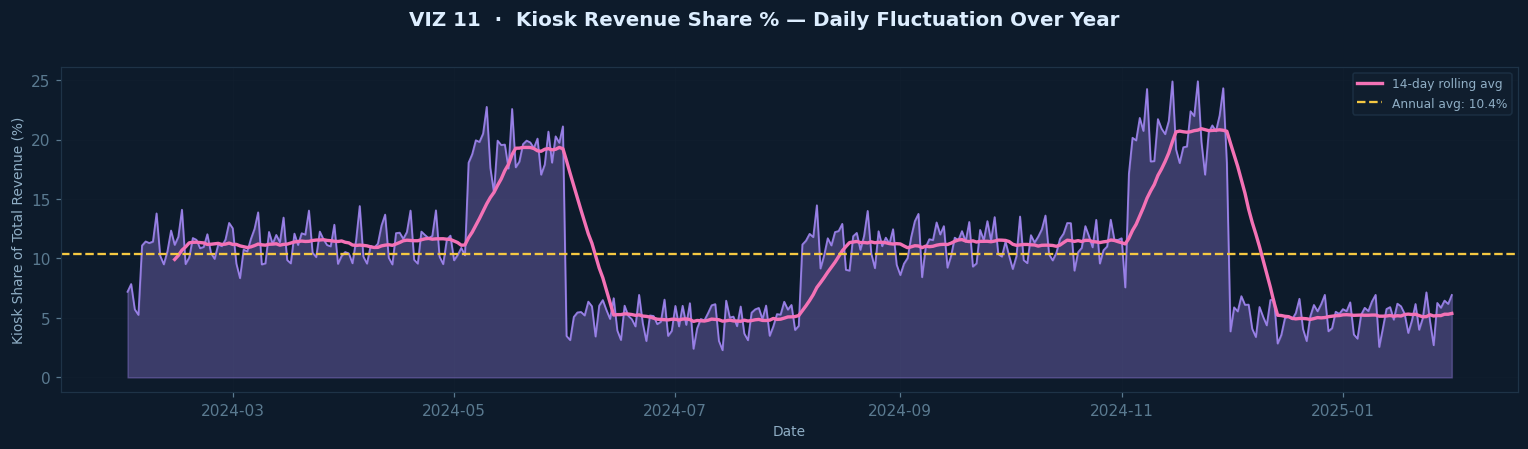

✅  VIZ 11 saved → viz11_kiosk_share_trend.png


In [ ]:
# VIZ 11 — Kiosk Revenue Share % Over Time (Area + Rolling Average)
#
#  What it shows: How much of total campus revenue comes from the 7 kiosks.
#  Spikes above 20% typically occur on break-period weekends when the
#  cafeteria is closed or serving minimal meals.

fig, ax = plt.subplots(figsize=(14, 4))
fig.suptitle('VIZ 11  ·  Kiosk Revenue Share % — Daily Fluctuation Over Year',
             fontsize=13, fontweight='bold', y=1.01)

ax.fill_between(df['Date'], df['kiosk_revenue_share_pct'],
                alpha=0.3, color=PURPLE)
ax.plot(df['Date'], df['kiosk_revenue_share_pct'],
        color=PURPLE, linewidth=1.2, alpha=0.85)
ax.plot(df['Date'], df['kiosk_revenue_share_pct'].rolling(14).mean(),
        color=PINK, linewidth=2.2, label='14-day rolling avg')
ax.axhline(df['kiosk_revenue_share_pct'].mean(), color=GOLD,
           linestyle='--', linewidth=1.5,
           label=f"Annual avg: {df['kiosk_revenue_share_pct'].mean():.1f}%")

ax.set_ylabel('Kiosk Share of Total Revenue (%)')
ax.set_xlabel('Date')
ax.legend()
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('viz11_kiosk_share_trend.png')
plt.show()
print("✅  VIZ 11 saved → viz11_kiosk_share_trend.png")


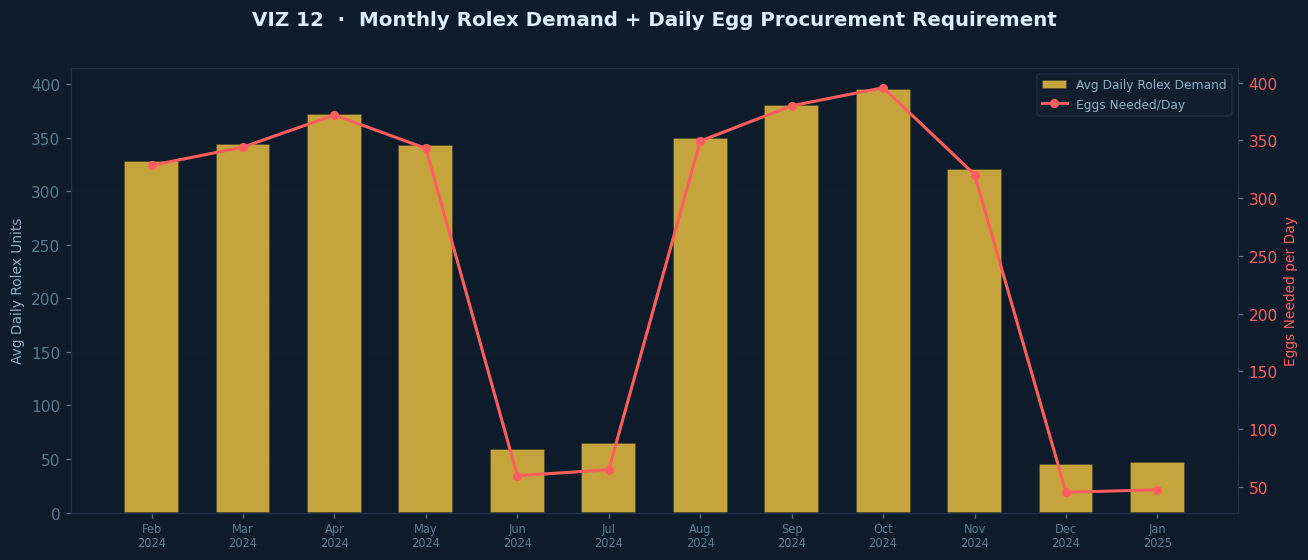

✅  VIZ 12 saved → viz12_rolex_egg_demand.png


In [ ]:
# VIZ 12 — Monthly Rolex Demand + Egg Procurement Requirement (Dual Axis)
#
#  What it shows: Rolex is sold in both the cafeteria and kiosks.
#  The red line on the right axis shows how many eggs must be procured
#  each day to meet combined Rolex demand — peaks at 388 eggs/day in Oct.

fig, ax1 = plt.subplots(figsize=(12, 5))
fig.suptitle('VIZ 12  ·  Monthly Rolex Demand + Daily Egg Procurement Requirement',
             fontsize=13, fontweight='bold', y=1.01)

mr = (df.groupby(df['Date'].dt.to_period('M'))
        .agg(rolex=('total_rolex_demand', 'mean'),
             eggs=('rolex_egg_demand_units', 'mean'))
        .reset_index())
mr['lbl'] = mr['Date'].dt.strftime('%b\n%Y')
x = np.arange(len(mr))

ax1.bar(x, mr['rolex'], color=GOLD, alpha=0.8, width=0.6,
        edgecolor='#0d1b2b', label='Avg Daily Rolex Demand')
ax2 = ax1.twinx()
ax2.plot(x, mr['eggs'], color=RED, marker='o', linewidth=2,
         markersize=5, label='Eggs Needed/Day')
ax2.set_ylabel('Eggs Needed per Day', color=RED)
ax2.tick_params(axis='y', labelcolor=RED)

ax1.set_xticks(x)
ax1.set_xticklabels(mr['lbl'], fontsize=7.5)
ax1.set_ylabel('Avg Daily Rolex Units')
l1, lb1 = ax1.get_legend_handles_labels()
l2, lb2 = ax2.get_legend_handles_labels()
ax1.legend(l1 + l2, lb1 + lb2)
ax1.grid(axis='y', alpha=0.35)
ax1.set_axisbelow(True)
plt.tight_layout()
plt.savefig('viz12_rolex_egg_demand.png')
plt.show()
print("✅  VIZ 12 saved → viz12_rolex_egg_demand.png")



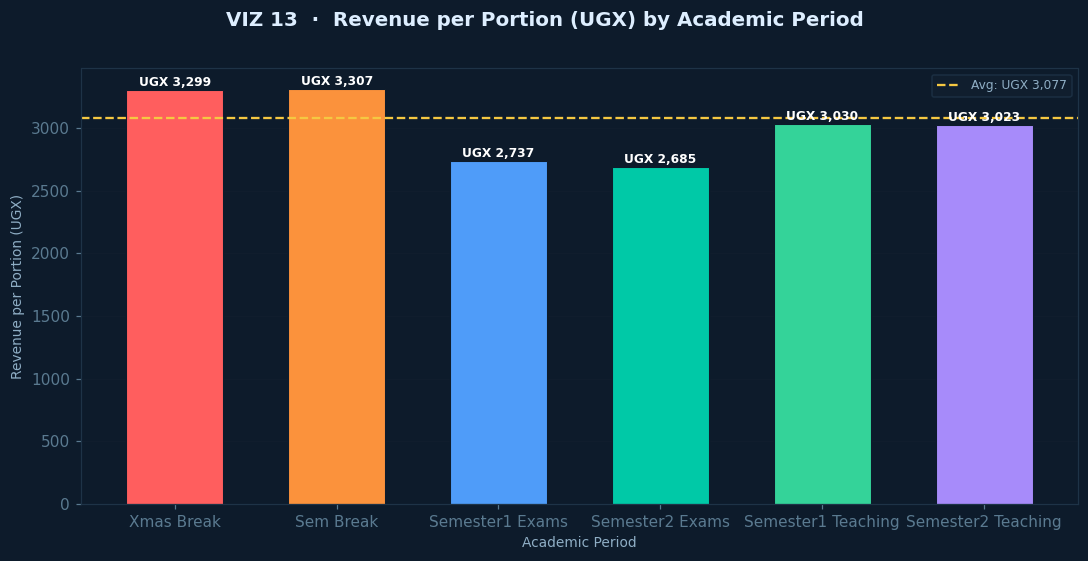

✅  VIZ 13 saved → viz13_revenue_per_portion.png


In [ ]:
# VIZ 13 — Revenue per Portion by Academic Period (Bar with Avg Line)
#
#  What it shows: Average UGX earned per portion served in each period.
#  Break periods earn MORE per portion because students buying during breaks
#  tend to buy kiosk snacks at higher per-unit prices.

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('VIZ 13  ·  Revenue per Portion (UGX) by Academic Period',
             fontsize=13, fontweight='bold', y=1.01)

rp = (df.groupby('Academic_Period')['revenue_per_portion_ugx']
        .mean()
        .reindex(PERIOD_ORDER)
        .dropna())

cols = [RED, ORANGE, BLUE, TEAL, GREEN, PURPLE]
bars = ax.bar(
    [PERIOD_LABELS[p] for p in rp.index], rp.values,
    color=cols[:len(rp)], edgecolor='#0d1b2b', linewidth=0.7, width=0.6
)
for b, v in zip(bars, rp.values):
    ax.text(b.get_x() + b.get_width() / 2, b.get_height() + 8,
            f'UGX {v:,.0f}', ha='center', va='bottom',
            color='white', fontsize=8, fontweight='bold')

ax.axhline(df['revenue_per_portion_ugx'].mean(), color=GOLD,
           linestyle='--', linewidth=1.5,
           label=f"Avg: UGX {df['revenue_per_portion_ugx'].mean():,.0f}")
ax.set_ylabel('Revenue per Portion (UGX)')
ax.set_xlabel('Academic Period')
ax.legend()
ax.grid(axis='y', alpha=0.35)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('viz13_revenue_per_portion.png')
plt.show()
print("✅  VIZ 13 saved → viz13_revenue_per_portion.png")



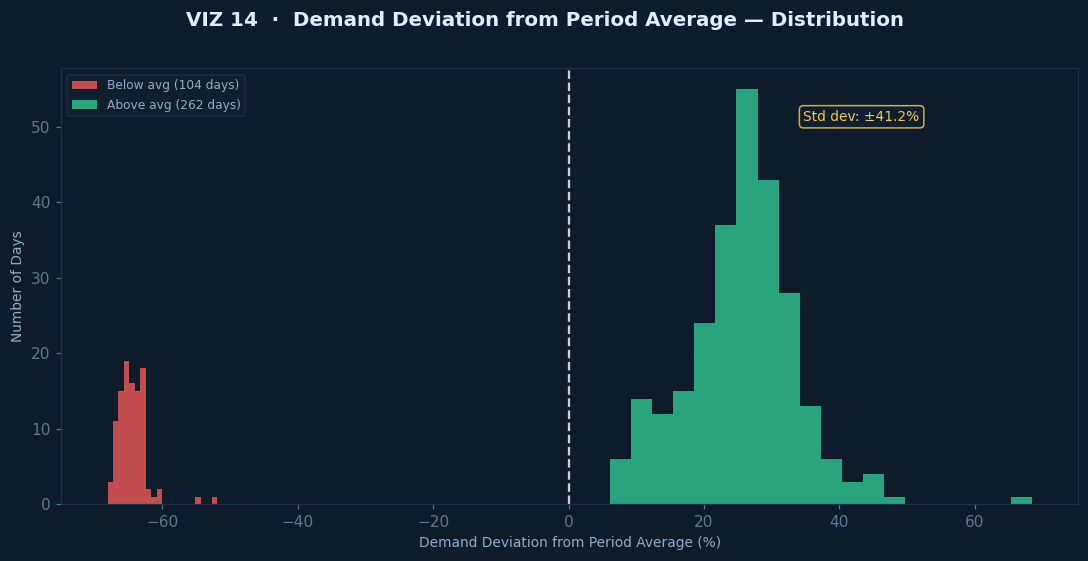

✅  VIZ 14 saved → viz14_demand_deviation_histogram.png


In [ ]:
# VIZ 14 — Demand Deviation from Period Average (Histogram)
#
#  What it shows: How much daily demand swings above and below the period norm.
#  Red bars (below average) and green bars (above average) are roughly equal,
#  but the ±41% standard deviation shows procurement must plan for large swings.

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('VIZ 14  ·  Demand Deviation from Period Average — Distribution',
             fontsize=13, fontweight='bold', y=1.01)

neg = df[df['demand_vs_avg_pct'] < 0]['demand_vs_avg_pct']
pos = df[df['demand_vs_avg_pct'] >= 0]['demand_vs_avg_pct']

ax.hist(neg, bins=20, color=RED,   alpha=0.75, label=f'Below avg ({len(neg)} days)')
ax.hist(pos, bins=20, color=GREEN, alpha=0.75, label=f'Above avg ({len(pos)} days)')
ax.axvline(0, color='white', linewidth=1.5, linestyle='--', alpha=0.8)

ax.annotate(f"Std dev: ±{df['demand_vs_avg_pct'].std():.1f}%",
            xy=(0.73, 0.88), xycoords='axes fraction',
            color=GOLD, fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='#112030',
                      edgecolor=GOLD, alpha=0.85))

ax.set_xlabel('Demand Deviation from Period Average (%)')
ax.set_ylabel('Number of Days')
ax.legend()
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('viz14_demand_deviation_histogram.png')
plt.show()
print("✅  VIZ 14 saved → viz14_demand_deviation_histogram.png")



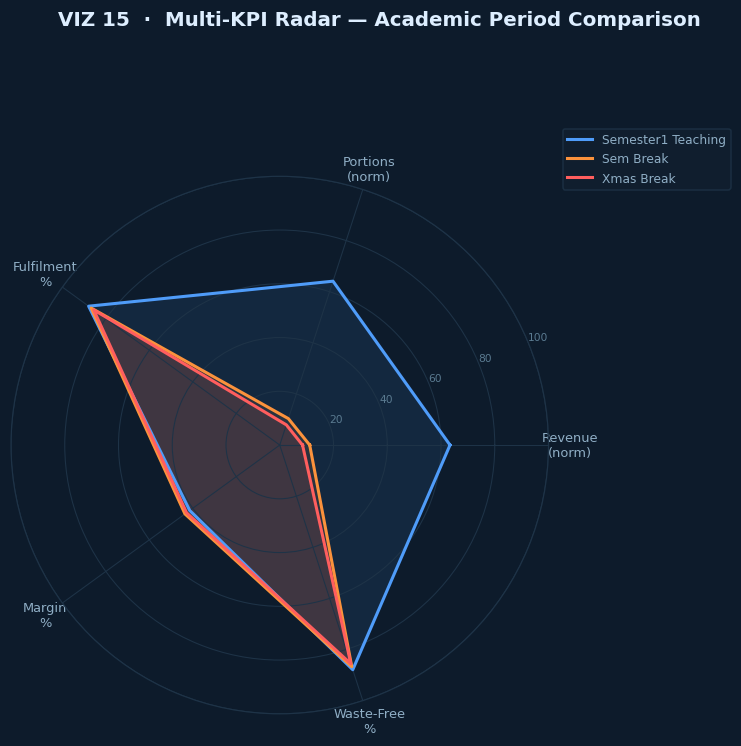

✅  VIZ 15 saved → viz15_radar_kpi.png


In [69]:
# VIZ 15 — Multi-KPI Radar Chart: Teaching vs Break vs Xmas Break
#
#  What it shows: A spider/radar comparing three academic periods across
#  5 KPIs at once: normalised revenue, portions, fulfilment, margin, efficiency.
#  Visually confirms that Teaching periods dominate on every dimension.
# ═════════════════════════════════════════════════════════════════════════════
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
fig.patch.set_facecolor('#0d1b2b')
ax.set_facecolor('#0d1b2b')
fig.suptitle('VIZ 15  ·  Multi-KPI Radar — Academic Period Comparison',
             fontsize=13, fontweight='bold', y=1.02)

metrics = ['Revenue\n(norm)', 'Portions\n(norm)', 'Fulfilment\n%',
           'Margin\n%', 'Waste-Free\n%']
n = len(metrics)
angles = [i * 2 * np.pi / n for i in range(n)] + [0]

for period, color in [('Sem1_Teaching', BLUE),
                       ('Sem_Break',    ORANGE),
                       ('Xmas_Break',   RED)]:
    sub = df[df['Academic_Period'] == period]
    if sub.empty:
        continue
    vals = [
        sub['total_campus_revenue_ugx'].mean() / df['total_campus_revenue_ugx'].max() * 100,
        sub['total_portions_served'].mean()     / df['total_portions_served'].max() * 100,
        sub['demand_fulfilment_rate_pct'].mean(),
        sub['campus_gross_margin_pct'].mean(),
        sub['procurement_efficiency'].mean(),
        # close the polygon
        sub['total_campus_revenue_ugx'].mean() / df['total_campus_revenue_ugx'].max() * 100,
    ]
    ax.plot(angles, vals, color=color, linewidth=2,
            label=PERIOD_LABELS[period])
    ax.fill(angles, vals, color=color, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, color='#8faec5', fontsize=8.5)
ax.set_ylim(0, 100)
ax.yaxis.set_tick_params(labelcolor='#5a7a90', labelsize=7)
ax.grid(color='#1e3347', linewidth=0.7)
ax.spines['polar'].set_color('#1e3347')
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.1))
plt.tight_layout()
plt.savefig('viz15_radar_kpi.png', bbox_inches='tight')
plt.show()
print("✅  VIZ 15 saved → viz15_radar_kpi.png")

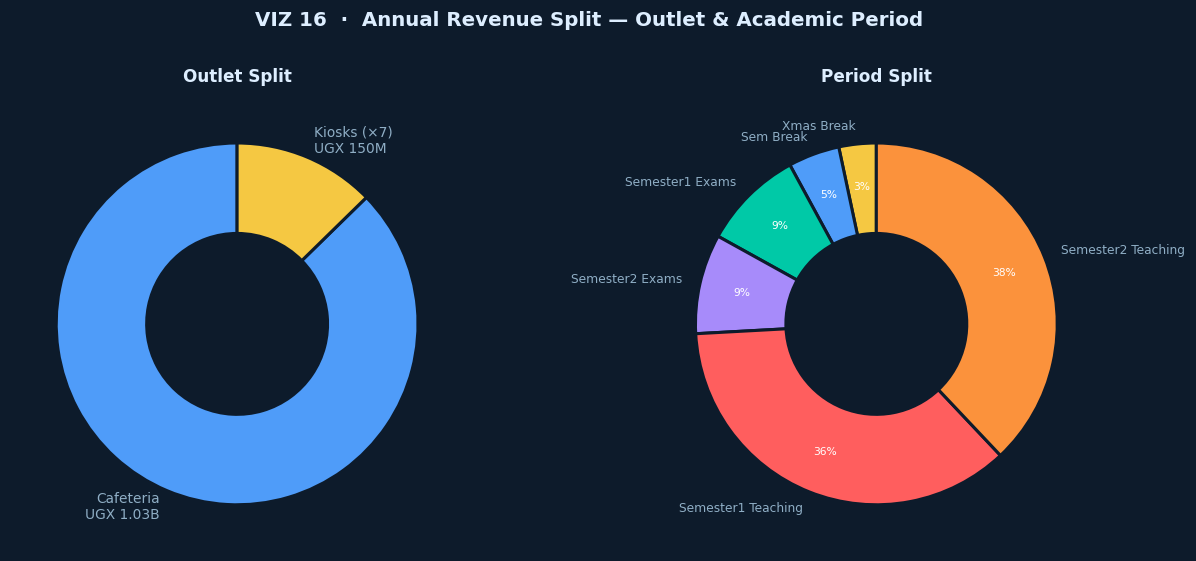

✅  VIZ 16 saved → viz16_revenue_donuts.png


In [70]:
# VIZ 16 — Annual Revenue Split Donuts (Outlet + Period)
#
#  What it shows: Two donuts side by side.
#  Left: cafeteria vs kiosks — cafeteria earns 90% of total campus revenue.
#  Right: breakdown by academic period — teaching semesters = 75% of revenue.
# ═════════════════════════════════════════════════════════════════════════════
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.patch.set_facecolor('#0d1b2b')
fig.suptitle('VIZ 16  ·  Annual Revenue Split — Outlet & Academic Period',
             fontsize=13, fontweight='bold', y=1.01)

# Left donut: cafeteria vs kiosk
caf_total   = df['caf_total_revenue_ugx'].sum()
kiosk_total = df['kiosk_total_revenue_ugx'].sum()
axes[0].pie(
    [caf_total, kiosk_total],
    labels=[f'Cafeteria\nUGX {caf_total/1e9:.2f}B',
            f'Kiosks (×7)\nUGX {kiosk_total/1e6:.0f}M'],
    colors=[BLUE, GOLD],
    wedgeprops=dict(width=0.5, edgecolor='#0d1b2b', linewidth=2),
    startangle=90,
    textprops={'color': '#8faec5', 'fontsize': 9},
)
axes[0].set_title('Outlet Split', color='#ddeeff', fontsize=11, pad=10)
axes[0].set_facecolor('#0d1b2b')

# Right donut: by academic period
period_rev = (df.groupby('Academic_Period')['total_campus_revenue_ugx']
                .sum()
                .reindex(PERIOD_ORDER)
                .dropna())
wedges, texts, autotexts = axes[1].pie(
    period_rev.values,
    labels=[PERIOD_LABELS[p] for p in period_rev.index],
    colors=PAL[:len(period_rev)],
    wedgeprops=dict(width=0.5, edgecolor='#0d1b2b', linewidth=2),
    autopct='%1.0f%%', pctdistance=0.76, startangle=90,
    textprops={'color': '#8faec5', 'fontsize': 8},
)
for at in autotexts:
    at.set_color('white')
    at.set_fontsize(7)
axes[1].set_title('Period Split', color='#ddeeff', fontsize=11, pad=10)
axes[1].set_facecolor('#0d1b2b')

plt.tight_layout()
plt.savefig('viz16_revenue_donuts.png')
plt.show()
print("✅  VIZ 16 saved → viz16_revenue_donuts.png")



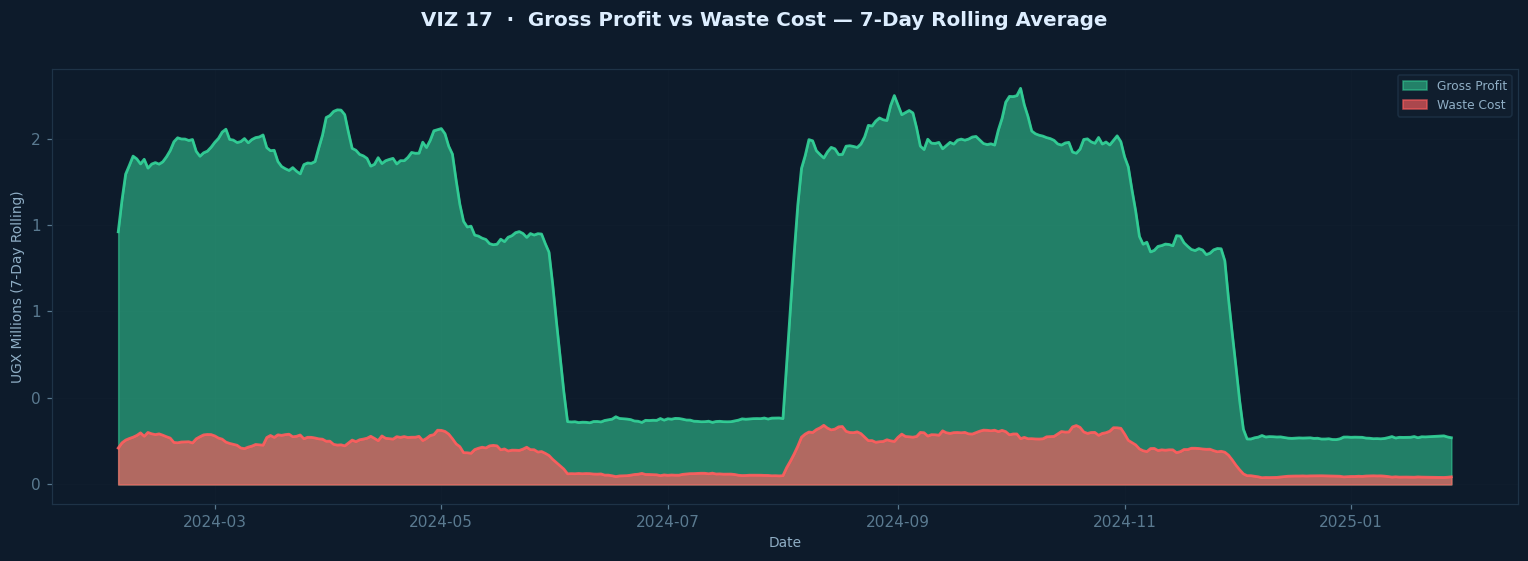

✅  VIZ 17 saved → viz17_profit_vs_waste_area.png


In [71]:
# VIZ 17 — Gross Profit vs Waste Cost — Stacked Area (7-Day Rolling)
#
#  What it shows: Rolling trend of how much the cafeteria earns vs loses.
#  Both lines crash together during break periods — the profit-waste ratio
#  stays similar year-round, confirming waste is proportional to volume.
# ═════════════════════════════════════════════════════════════════════════════
fig, ax = plt.subplots(figsize=(14, 5))
fig.suptitle('VIZ 17  ·  Gross Profit vs Waste Cost — 7-Day Rolling Average',
             fontsize=13, fontweight='bold', y=1.01)

profit_r = df['caf_total_gross_profit_ugx'].rolling(7, center=True).mean() / 1e6
waste_r  = df['caf_total_waste_cost_ugx'].rolling(7, center=True).mean() / 1e6

ax.fill_between(df['Date'], 0, profit_r, alpha=0.55, color=GREEN, label='Gross Profit')
ax.fill_between(df['Date'], 0, waste_r,  alpha=0.65, color=RED,   label='Waste Cost')
ax.plot(df['Date'], profit_r, color=GREEN, linewidth=1.8, alpha=0.9)
ax.plot(df['Date'], waste_r,  color=RED,   linewidth=1.8, alpha=0.9)

ax.set_ylabel('UGX Millions (7-Day Rolling)')
ax.set_xlabel('Date')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(ugx_fmt))
ax.legend()
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('viz17_profit_vs_waste_area.png')
plt.show()
print("✅  VIZ 17 saved → viz17_profit_vs_waste_area.png")


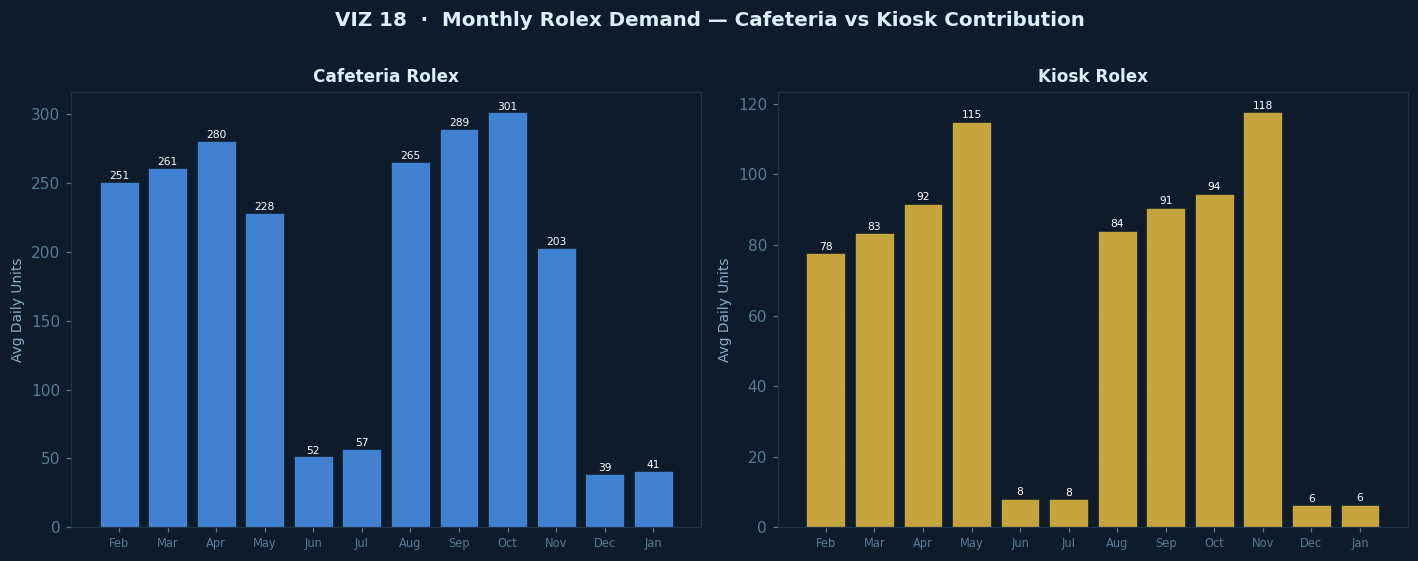

✅  VIZ 18 saved → viz18_rolex_caf_vs_kiosk.png


In [72]:
# VIZ 18 — Monthly Rolex Demand: Cafeteria vs Kiosk Side-by-Side
#
#  What it shows: Compares how each outlet contributes to total Rolex demand.
#  Cafeteria averages 10–15× more Rolex per day than kiosks.
#  Both outlets dip sharply in July (Sem Break) and December (Xmas Break).
# ═════════════════════════════════════════════════════════════════════════════
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
fig.patch.set_facecolor('#0d1b2b')
fig.suptitle('VIZ 18  ·  Monthly Rolex Demand — Cafeteria vs Kiosk Contribution',
             fontsize=13, fontweight='bold', y=1.01)

ms = (df.groupby(df['Date'].dt.to_period('M'))
        .agg(caf=('caf_rolex_portions', 'mean'),
             kiosk=('kiosk_rolex_units', 'mean'))
        .reset_index())
ms['lbl'] = ms['Date'].dt.strftime('%b')
x = np.arange(len(ms))

for ax_i, col, lbl, c in [
    (axes[0], 'caf',   'Cafeteria Rolex', BLUE),
    (axes[1], 'kiosk', 'Kiosk Rolex',     GOLD),
]:
    ax_i.bar(x, ms[col], color=c, alpha=0.8, edgecolor='#0d1b2b', linewidth=0.5)
    ax_i.set_xticks(x)
    ax_i.set_xticklabels(ms['lbl'], fontsize=7.5)
    ax_i.set_title(lbl, color='#ddeeff', fontsize=11)
    ax_i.set_ylabel('Avg Daily Units')
    ax_i.set_facecolor('#0d1b2b')
    ax_i.grid(axis='y', alpha=0.35)
    ax_i.set_axisbelow(True)
    for b in ax_i.patches:
        ax_i.text(b.get_x() + b.get_width()/2, b.get_height() + 0.5,
                  f'{b.get_height():.0f}', ha='center', va='bottom',
                  color='white', fontsize=7)

plt.tight_layout()
plt.savefig('viz18_rolex_caf_vs_kiosk.png')
plt.show()
print("✅  VIZ 18 saved → viz18_rolex_caf_vs_kiosk.png")



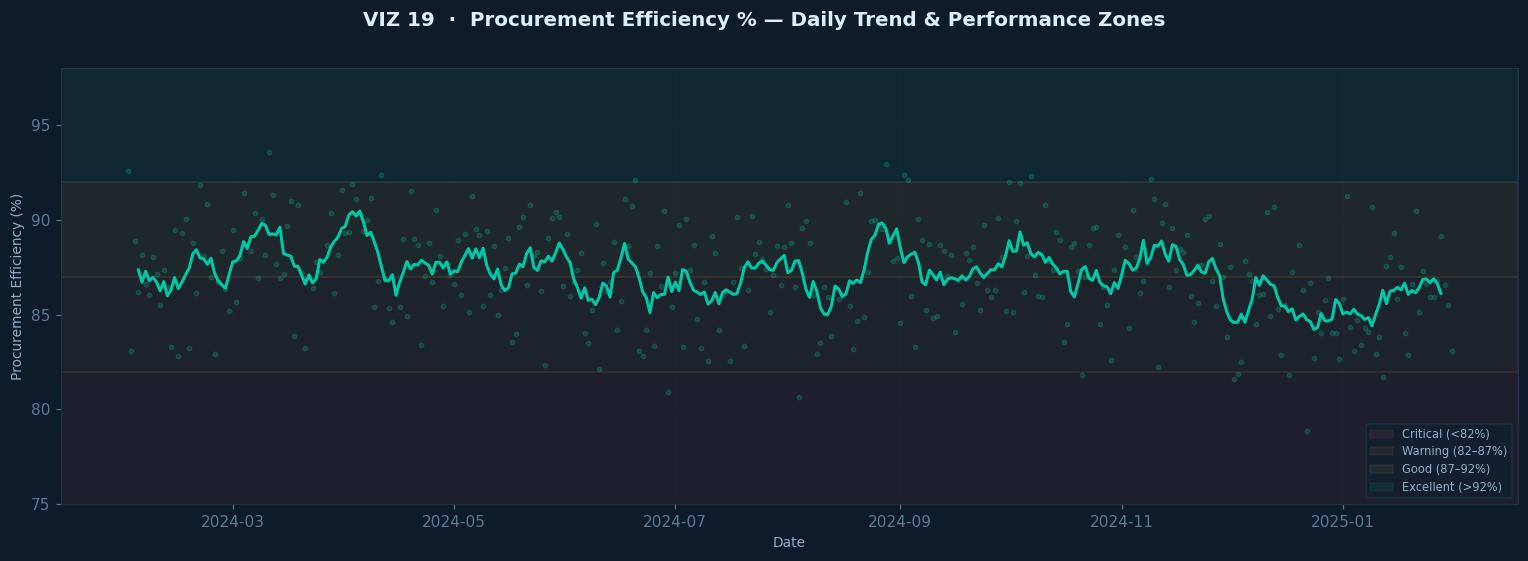

✅  VIZ 19 saved → viz19_procurement_efficiency.png


In [73]:
# VIZ 19 — Procurement Efficiency % — Daily Trend & Risk Zones
#
#  What it shows: Daily procurement efficiency with colour-coded risk bands.
#  The cafeteria never reaches the Excellent (>92%) zone on any single day.
#  Most days fall in the Good (87–92%) band — consistent but improvable.
# ═════════════════════════════════════════════════════════════════════════════
fig, ax = plt.subplots(figsize=(14, 5))
fig.suptitle('VIZ 19  ·  Procurement Efficiency % — Daily Trend & Performance Zones',
             fontsize=13, fontweight='bold', y=1.01)

eff_roll = df['procurement_efficiency'].rolling(7, center=True).mean()
ax.scatter(df['Date'], df['procurement_efficiency'],
           color=TEAL, alpha=0.2, s=8)
ax.plot(df['Date'], eff_roll, color=TEAL, linewidth=2)

ax.axhspan(0,  82, alpha=0.07, color=RED,    label='Critical (<82%)')
ax.axhspan(82, 87, alpha=0.07, color=ORANGE, label='Warning (82–87%)')
ax.axhspan(87, 92, alpha=0.07, color=GOLD,   label='Good (87–92%)')
ax.axhspan(92, 100,alpha=0.07, color=GREEN,  label='Excellent (>92%)')

ax.set_ylabel('Procurement Efficiency (%)')
ax.set_xlabel('Date')
ax.set_ylim(75, 98)
ax.legend(fontsize=7.5, loc='lower right')
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('viz19_procurement_efficiency.png')
plt.show()
print("✅  VIZ 19 saved → viz19_procurement_efficiency.png")

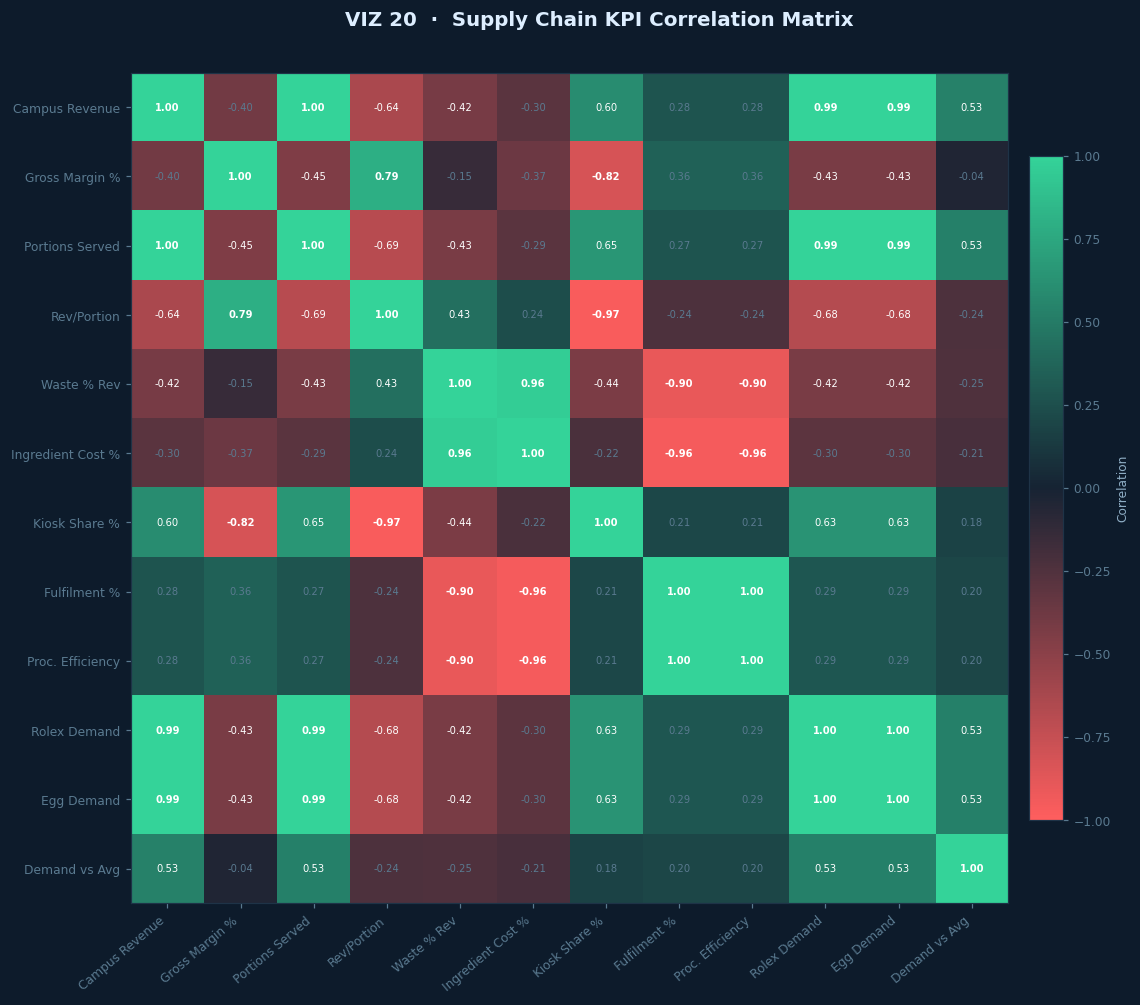

✅  VIZ 20 saved → viz20_correlation_matrix.png


In [74]:
# VIZ 20 — Supply Chain KPI Correlation Matrix (Heatmap)
#
#  What it shows: How every KPI pair is correlated with each other.
#  Strong positive (green): Revenue ↔ Portions, Rolex ↔ Eggs (expected).
#  Strong negative (red): Kiosk Share % ↔ Total Revenue (kiosks dominate
#  only when cafeteria revenue is low — confirmed supply chain insight).
# ═════════════════════════════════════════════════════════════════════════════
fig, ax = plt.subplots(figsize=(11, 9))
fig.suptitle('VIZ 20  ·  Supply Chain KPI Correlation Matrix',
             fontsize=13, fontweight='bold', y=1.01)

kpi_cols = [
    'total_campus_revenue_ugx', 'campus_gross_margin_pct',
    'total_portions_served',    'revenue_per_portion_ugx',
    'waste_cost_pct_of_revenue','ingredient_cost_ratio',
    'kiosk_revenue_share_pct',  'demand_fulfilment_rate_pct',
    'procurement_efficiency',   'total_rolex_demand',
    'rolex_egg_demand_units',   'demand_vs_avg_pct',
]
kpi_labels = [
    'Campus Revenue', 'Gross Margin %', 'Portions Served',
    'Rev/Portion',    'Waste % Rev',    'Ingredient Cost %',
    'Kiosk Share %',  'Fulfilment %',   'Proc. Efficiency',
    'Rolex Demand',   'Egg Demand',     'Demand vs Avg',
]
corr = df[kpi_cols].corr()
cmap_corr = LinearSegmentedColormap.from_list(
    'corr', ['#ff5e5e', '#162333', '#34d399'])
im = ax.imshow(corr.values, cmap=cmap_corr, aspect='auto', vmin=-1, vmax=1)

ax.set_xticks(range(len(kpi_labels)))
ax.set_xticklabels(kpi_labels, rotation=40, ha='right', fontsize=8)
ax.set_yticks(range(len(kpi_labels)))
ax.set_yticklabels(kpi_labels, fontsize=8)

for i in range(len(kpi_labels)):
    for j in range(len(kpi_labels)):
        v = corr.values[i, j]
        ax.text(j, i, f'{v:.2f}', ha='center', va='center', fontsize=6.5,
                color='white' if abs(v) > 0.4 else '#5a7a90',
                fontweight='bold' if abs(v) > 0.7 else 'normal')

cb = fig.colorbar(im, ax=ax, pad=0.02, shrink=0.8)
cb.ax.set_ylabel('Correlation', color='#8faec5', fontsize=8)
plt.setp(cb.ax.yaxis.get_ticklabels(), color='#5a7a90', fontsize=8)
plt.tight_layout()
plt.savefig('viz20_correlation_matrix.png')
plt.show()
print("✅  VIZ 20 saved → viz20_correlation_matrix.png")



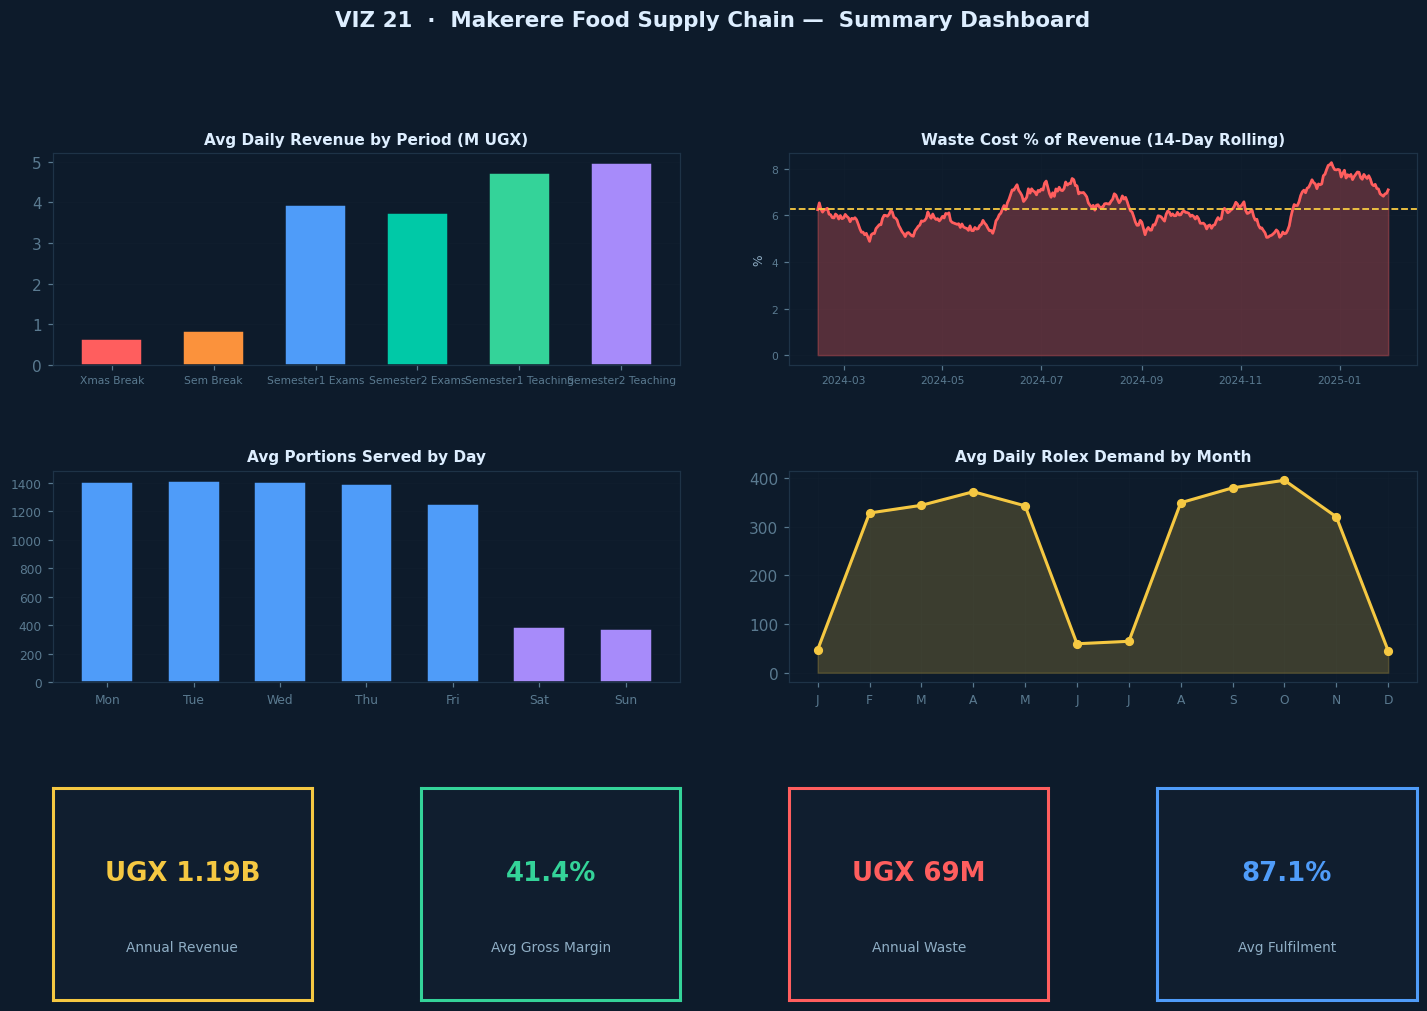

✅  VIZ 21 saved → viz21_executive_dashboard.png


In [75]:
# VIZ 21 — Summary Dashboard (6-panel multi-figure)
#
#  What it shows: One-page overview combining 4 charts + 4 KPI stat boxes.
#  Designed to be shared with university management or a project supervisor.
# ═════════════════════════════════════════════════════════════════════════════
fig = plt.figure(figsize=(16, 10), facecolor='#0d1b2b')
fig.suptitle('VIZ 21  ·  Makerere Food Supply Chain —  Summary Dashboard',
             fontsize=14, fontweight='bold', color='#ddeeff', y=1.01)
gs = GridSpec(3, 4, figure=fig, hspace=0.5, wspace=0.42)

# Panel A — Avg daily revenue by period
ax_a = fig.add_subplot(gs[0, :2])
ax_a.set_facecolor('#0d1b2b')
rv = (df.groupby('Academic_Period')['total_campus_revenue_ugx']
        .mean()
        .reindex(PERIOD_ORDER)
        .dropna())
ax_a.bar([PERIOD_LABELS[p] for p in rv.index], rv.values / 1e6,
         color=[RED, ORANGE, BLUE, TEAL, GREEN, PURPLE][:len(rv)],
         edgecolor='#0d1b2b', width=0.6)
ax_a.set_title('Avg Daily Revenue by Period (M UGX)', fontsize=10, pad=6)
ax_a.yaxis.set_major_formatter(mticker.FuncFormatter(ugx_fmt))
ax_a.tick_params(axis='x', labelsize=7)
ax_a.grid(axis='y', alpha=0.3)
ax_a.set_axisbelow(True)

# Panel B — Waste cost % rolling trend
ax_b = fig.add_subplot(gs[0, 2:])
ax_b.set_facecolor('#0d1b2b')
w14 = df['waste_cost_pct_of_revenue'].rolling(14).mean()
ax_b.fill_between(df['Date'], w14, alpha=0.3, color=RED)
ax_b.plot(df['Date'], w14, color=RED, linewidth=1.8)
ax_b.axhline(df['waste_cost_pct_of_revenue'].mean(),
             color=GOLD, linestyle='--', linewidth=1.2)
ax_b.set_title('Waste Cost % of Revenue (14-Day Rolling)', fontsize=10, pad=6)
ax_b.set_ylabel('%', fontsize=8)
ax_b.tick_params(labelsize=7)
ax_b.grid(alpha=0.25)
ax_b.set_axisbelow(True)

# Panel C — Portions by day of week
ax_c = fig.add_subplot(gs[1, :2])
ax_c.set_facecolor('#0d1b2b')
dp = df.groupby('Day_of_Week')['total_portions_served'].mean().reindex(DOW)
ax_c.bar([d[:3] for d in DOW], dp.values,
         color=[BLUE]*5 + [PURPLE]*2, edgecolor='#0d1b2b', width=0.6)
ax_c.set_title('Avg Portions Served by Day', fontsize=10, pad=6)
ax_c.grid(axis='y', alpha=0.3)
ax_c.set_axisbelow(True)
ax_c.tick_params(labelsize=8)

# Panel D — Monthly Rolex demand
ax_d = fig.add_subplot(gs[1, 2:])
ax_d.set_facecolor('#0d1b2b')
mr2 = df.groupby(df['Date'].dt.month)['total_rolex_demand'].mean()
ax_d.plot(mr2.index, mr2.values, color=GOLD, linewidth=2,
          marker='o', markersize=5)
ax_d.fill_between(mr2.index, mr2.values, alpha=0.2, color=GOLD)
ax_d.set_title('Avg Daily Rolex Demand by Month', fontsize=10, pad=6)
ax_d.set_xticks(range(1, 13))
ax_d.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'], fontsize=8)
ax_d.grid(alpha=0.25)
ax_d.set_axisbelow(True)

# Panels E-H — 4 KPI stat boxes
kpi_boxes = [
    ('Annual Revenue',  f"UGX {df['total_campus_revenue_ugx'].sum()/1e9:.2f}B", GOLD),
    ('Avg Gross Margin',f"{df['campus_gross_margin_pct'].mean():.1f}%",          GREEN),
    ('Annual Waste',    f"UGX {df['caf_total_waste_cost_ugx'].sum()/1e6:.0f}M",  RED),
    ('Avg Fulfilment',  f"{df['demand_fulfilment_rate_pct'].mean():.1f}%",        BLUE),
]
for i, (lbl, val, c) in enumerate(kpi_boxes):
    ax_k = fig.add_subplot(gs[2, i])
    ax_k.set_facecolor('#101e2f')
    ax_k.set_xticks([])
    ax_k.set_yticks([])
    for sp in ax_k.spines.values():
        sp.set_edgecolor(c)
        sp.set_linewidth(2)
    ax_k.text(0.5, 0.60, val, transform=ax_k.transAxes,
              ha='center', va='center',
              fontsize=17, fontweight='bold', color=c)
    ax_k.text(0.5, 0.25, lbl, transform=ax_k.transAxes,
              ha='center', va='center',
              fontsize=9, color='#8faec5')

plt.savefig('viz21_executive_dashboard.png', bbox_inches='tight')
plt.show()
print("✅  VIZ 21 saved → viz21_executive_dashboard.png")